In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
        'font.family': 'Helvetica, Arial, sans-serif'
})

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
names = ['n', 'h', 'r', 'bigr']
v = {}
for name in names:
    v[name] = loadtxt('../data/b/' + name + '.txt')

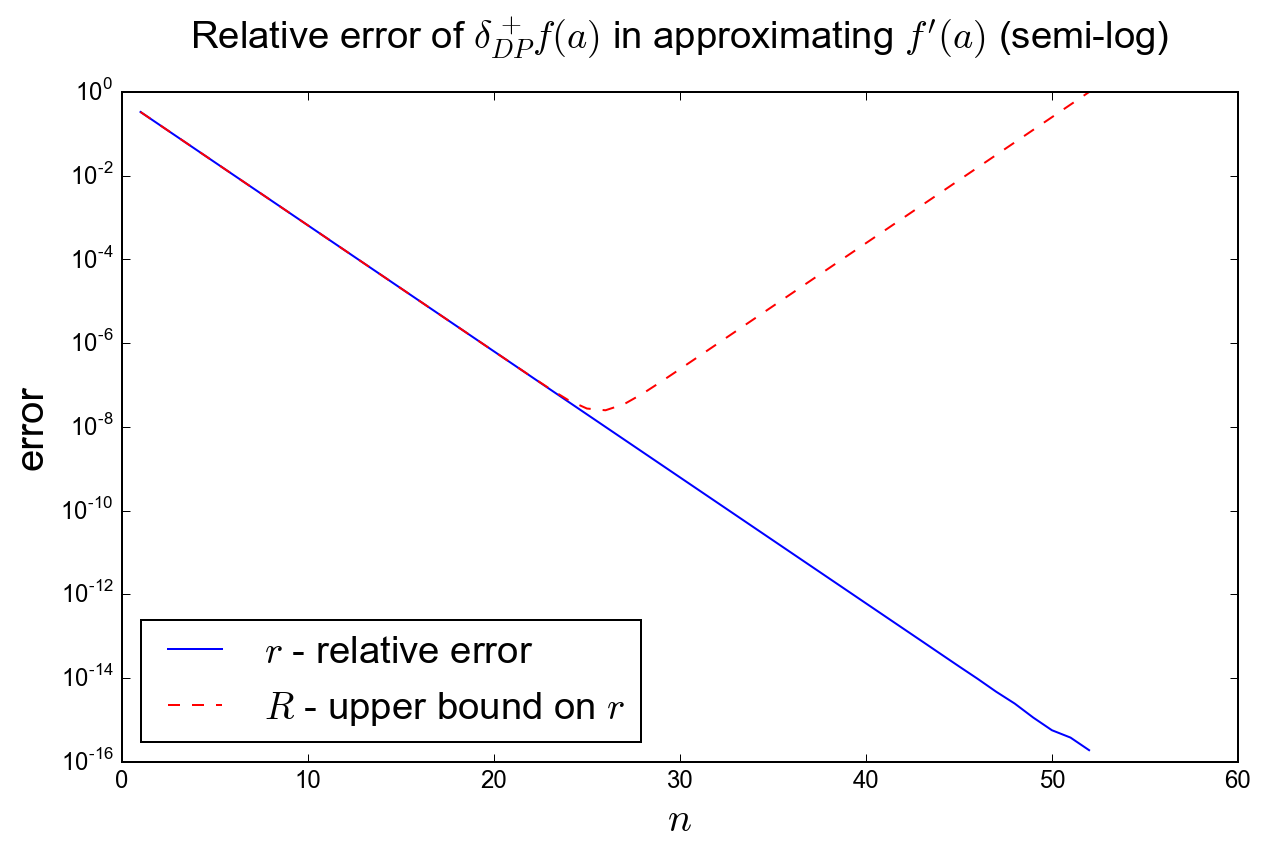

In [20]:
# create a semilogy plot that overlays r versus n with 
# a solid blue line, and R versus n with a red dashed 
# line...

pylab.semilogy(v['n'], v['r'], '-b')
pylab.semilogy(v['n'], v['bigr'], '--r')

pylab.legend(('$r$ - relative error',
              '$R$ - upper bound on $r$'), loc=3)

pylab.xlabel('$n$')
pylab.ylabel('error')
pylab.title('Relative error of $\delta^+_{DP}f(a)$ in approximating $f\'(a)$ (semi-log)', y=1.05)

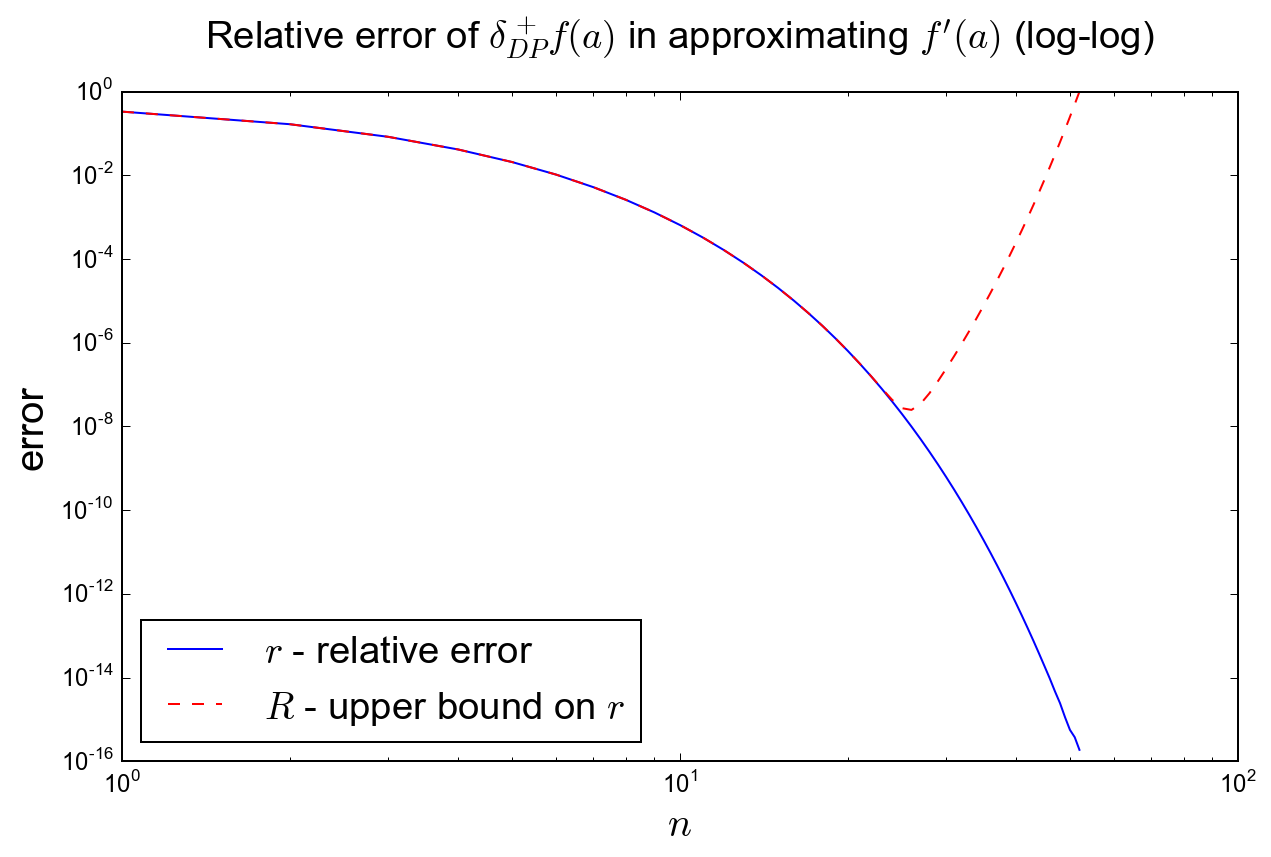

In [21]:
# create a different loglog plot that overlays 
# r versus h with a solid blue line, and 
# R versus h with a red dashed line...

pylab.loglog(v['n'], v['r'], '-b')
pylab.loglog(v['n'], v['bigr'], '--r')

pylab.legend(('$r$ - relative error',
              '$R$ - upper bound on $r$'), loc=3)

pylab.xlabel('$n$')
pylab.ylabel('error')
pylab.title('Relative error of $\delta^+_{DP}f(a)$ in approximating $f\'(a)$ (log-log)', y=1.05)